<a href="https://colab.research.google.com/github/theluminoous/DE/blob/main/DE_TASK_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
data = pd.read_csv('/Project.csv')

In [4]:
data

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11.0,6.0,3.0
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11.0,6.0,4.0
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12.0,6.0,4.0
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19.0,6.0,4.0
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43089,95774,15-05-2023,08:31:25,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Monday,8.0,5.0,0.0
43090,96246,15-05-2023,11:45:45,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Monday,11.0,5.0,0.0
43091,96262,15-05-2023,12:03:33,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Monday,12.0,5.0,0.0
43092,96439,15-05-2023,15:32:23,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Monday,15.0,5.0,0.0


In [5]:
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11.0,6.0,3.0
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11.0,6.0,4.0
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12.0,6.0,4.0
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19.0,6.0,4.0
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12.0,6.0,5.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43094 entries, 0 to 43093
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    43094 non-null  int64  
 1   transaction_date  43094 non-null  object 
 2   transaction_time  43094 non-null  object 
 3   store_id          43094 non-null  int64  
 4   store_location    43094 non-null  object 
 5   product_id        43094 non-null  int64  
 6   transaction_qty   43094 non-null  int64  
 7   unit_price        43094 non-null  float64
 8   Total_Bill        43094 non-null  float64
 9   product_category  43094 non-null  object 
 10  product_type      43094 non-null  object 
 11  product_detail    43094 non-null  object 
 12  Size              43093 non-null  object 
 13  Month Name        43093 non-null  object 
 14  Day Name          43093 non-null  object 
 15  Hour              43093 non-null  float64
 16  Month             43093 non-null  float6

In [7]:
data.shape

(43094, 18)

In [9]:
data.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,43094.000000,43094.000000,43094.000000,43094.0,43094.000000,43094.000000,43093.000000,43093.000000,43093.000000
mean,74449.509189,5.292616,48.785724,1.0,3.061853,3.061853,11.824125,3.989488,2.985520
std,42986.688007,2.099779,16.755470,0.0,0.482486,0.482486,3.772418,1.668311,1.997695
min,6.000000,3.000000,23.000000,1.0,2.500000,2.500000,6.000000,1.000000,0.000000
25%,37316.000000,3.000000,37.000000,1.0,2.500000,2.500000,9.000000,3.000000,1.000000
50%,74652.500000,5.000000,47.000000,1.0,3.000000,3.000000,11.000000,4.000000,3.000000
75%,111741.500000,8.000000,54.000000,1.0,3.750000,3.750000,15.000000,5.000000,5.000000
max,149455.000000,8.000000,87.000000,1.0,3.750000,3.750000,20.000000,6.000000,6.000000


In [10]:
data.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
store_id,0
store_location,0
product_id,0
transaction_qty,0
unit_price,0
Total_Bill,0
product_category,0


In [11]:
data.duplicated().sum()

0

In [16]:

data.dropna()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11.0,6.0,3.0
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11.0,6.0,4.0
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12.0,6.0,4.0
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19.0,6.0,4.0
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.00,3.00,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43088,95409,14-05-2023,17:55:03,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Sunday,17.0,5.0,6.0
43089,95774,15-05-2023,08:31:25,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Monday,8.0,5.0,0.0
43090,96246,15-05-2023,11:45:45,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Monday,11.0,5.0,0.0
43091,96262,15-05-2023,12:03:33,5,Lower Manhattan,60,1,3.75,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Monday,12.0,5.0,0.0


In [17]:
data.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
store_id,0
store_location,0
product_id,0
transaction_qty,0
unit_price,0
Total_Bill,0
product_category,0


In [19]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str)

In [21]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.strip()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43094 entries, 0 to 43093
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    43094 non-null  int64  
 1   transaction_date  43094 non-null  object 
 2   transaction_time  43094 non-null  object 
 3   store_id          43094 non-null  int64  
 4   store_location    43094 non-null  object 
 5   product_id        43094 non-null  int64  
 6   transaction_qty   43094 non-null  int64  
 7   unit_price        43094 non-null  float64
 8   Total_Bill        43094 non-null  float64
 9   product_category  43094 non-null  object 
 10  product_type      43094 non-null  object 
 11  product_detail    43094 non-null  object 
 12  Size              43094 non-null  object 
 13  Month Name        43094 non-null  object 
 14  Day Name          43094 non-null  object 
 15  Hour              43093 non-null  float64
 16  Month             43093 non-null  float6

In [23]:
data.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,43094.000000,43094.000000,43094.000000,43094.0,43094.000000,43094.000000,43093.000000,43093.000000,43093.000000
mean,74449.509189,5.292616,48.785724,1.0,3.061853,3.061853,11.824125,3.989488,2.985520
std,42986.688007,2.099779,16.755470,0.0,0.482486,0.482486,3.772418,1.668311,1.997695
min,6.000000,3.000000,23.000000,1.0,2.500000,2.500000,6.000000,1.000000,0.000000
25%,37316.000000,3.000000,37.000000,1.0,2.500000,2.500000,9.000000,3.000000,1.000000
50%,74652.500000,5.000000,47.000000,1.0,3.000000,3.000000,11.000000,4.000000,3.000000
75%,111741.500000,8.000000,54.000000,1.0,3.750000,3.750000,15.000000,5.000000,5.000000
max,149455.000000,8.000000,87.000000,1.0,3.750000,3.750000,20.000000,6.000000,6.000000


In [25]:
data['transaction_time'] = pd.to_datetime(data['transaction_time'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43094 entries, 0 to 43093
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    43094 non-null  int64         
 1   transaction_date  43094 non-null  object        
 2   transaction_time  43094 non-null  datetime64[ns]
 3   store_id          43094 non-null  int64         
 4   store_location    43094 non-null  object        
 5   product_id        43094 non-null  int64         
 6   transaction_qty   43094 non-null  int64         
 7   unit_price        43094 non-null  float64       
 8   Total_Bill        43094 non-null  float64       
 9   product_category  43094 non-null  object        
 10  product_type      43094 non-null  object        
 11  product_detail    43094 non-null  object        
 12  Size              43094 non-null  object        
 13  Month Name        43094 non-null  object        
 14  Day Name          4309

In [28]:
data['total_sales'] = data['transaction_qty'] * data['unit_price']

In [30]:
product_summary = data.groupby('product_detail').agg({'transaction_qty': 'sum','unit_price': 'mean','total_sales': 'sum'}).reset_index()

In [32]:
product_summary['profit'] = product_summary['total_sales'] - (product_summary['total_sales']) * 0.05

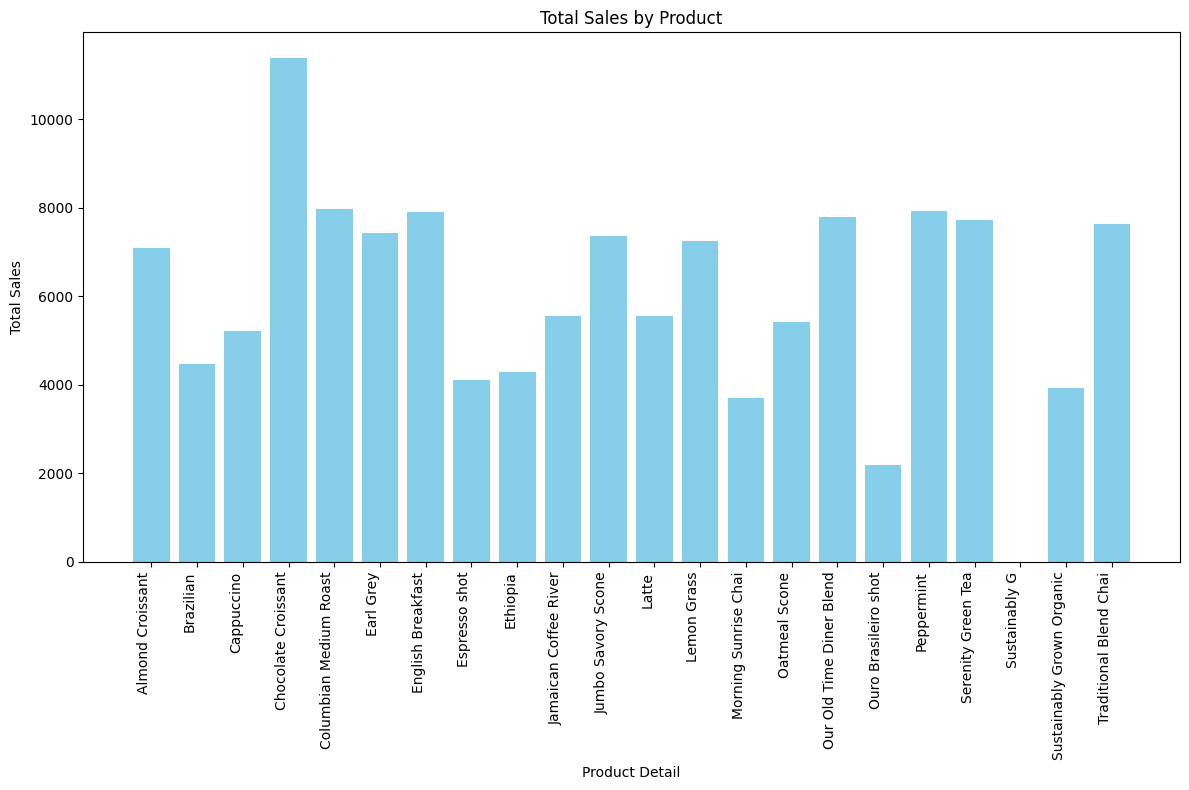

In [33]:
plt.figure(figsize=(12, 8))
plt.bar(product_summary['product_detail'], product_summary['total_sales'], color='skyblue')
plt.xlabel('Product Detail')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


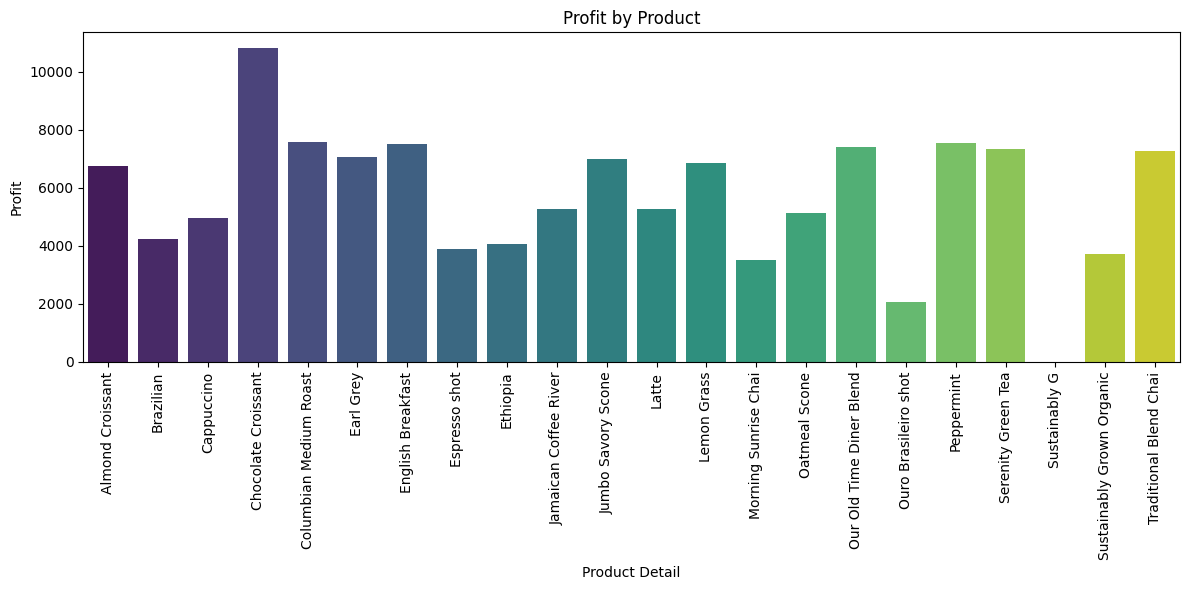

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_detail', y='profit', data=product_summary, hue = 'product_detail', palette='viridis')
plt.xticks(rotation=90)
plt.title('Profit by Product')
plt.xlabel('Product Detail')
plt.ylabel('Profit')
plt.legend([], frameon=False)
plt.tight_layout()
plt.show()


In [35]:
profitable_products = product_summary[product_summary['profit'] > 0]
print("Profitable products:\n", profitable_products)

Profitable products:
                product_detail  transaction_qty  unit_price  total_sales  \
0            Almond Croissant             1893    3.750000      7098.75   
1                   Brazilian             1490    3.000000      4470.00   
2                  Cappuccino             1389    3.750000      5208.75   
3         Chocolate Croissant             3039    3.750000     11396.25   
4      Columbian Medium Roast             2916    2.732339      7967.50   
5                   Earl Grey             2722    2.727774      7425.00   
6           English Breakfast             2864    2.758729      7901.00   
7               Espresso shot             1371    3.000000      4113.00   
8                    Ethiopia             1428    3.000000      4284.00   
9       Jamaican Coffee River             1483    3.750000      5561.25   
10         Jumbo Savory Scone             1965    3.750000      7368.75   
11                      Latte             1479    3.750000      5546.25   
12 

In [36]:
loss_products = product_summary[product_summary['profit'] <= 0]
print("Products incurring losses:\n", loss_products)

Products incurring losses:
 Empty DataFrame
Columns: [product_detail, transaction_qty, unit_price, total_sales, profit]
Index: []


In [37]:
top_profitable_products = profitable_products.sort_values(by='profit', ascending=False)
top_loss_making_products = loss_products.sort_values(by='profit', ascending=True)

Top 10 Profitable Products:
               product_detail  transaction_qty  unit_price  total_sales  \
3        Chocolate Croissant             3039    3.750000     11396.25   
4     Columbian Medium Roast             2916    2.732339      7967.50   
17                Peppermint             2885    2.750607      7935.50   
6          English Breakfast             2864    2.758729      7901.00   
15  Our Old Time Diner Blend             2847    2.741131      7804.00   
18        Serenity Green Tea             2823    2.740170      7735.50   
21    Traditional Blend Chai             2796    2.733548      7643.00   
5                  Earl Grey             2722    2.727774      7425.00   
10        Jumbo Savory Scone             1965    3.750000      7368.75   
12               Lemon Grass             2636    2.746775      7240.50   

        profit  
3   10826.4375  
4    7569.1250  
17   7538.7250  
6    7505.9500  
15   7413.8000  
18   7348.7250  
21   7260.8500  
5    7053.7500  
10 

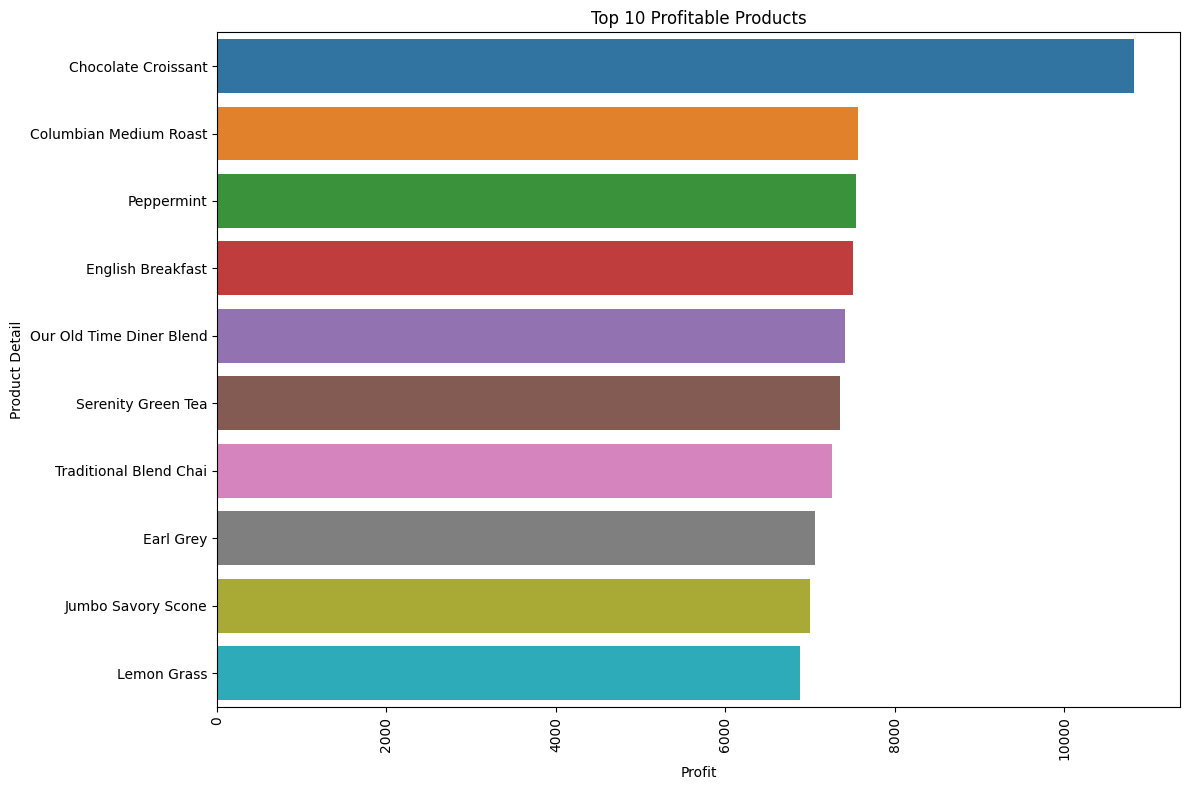

In [38]:
top_10_profitable = top_profitable_products.sort_values(by='profit', ascending=False).head(10)
print("Top 10 Profitable Products:\n", top_profitable_products.head(10))
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_detail', data=top_10_profitable, hue='product_detail')
plt.xticks(rotation=90)
plt.title('Top 10 Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product Detail')
plt.legend([], frameon=False)
plt.tight_layout()
plt.show()


Top 10 Loss-Making Products:
 Empty DataFrame
Columns: [product_detail, transaction_qty, unit_price, total_sales, profit]
Index: []


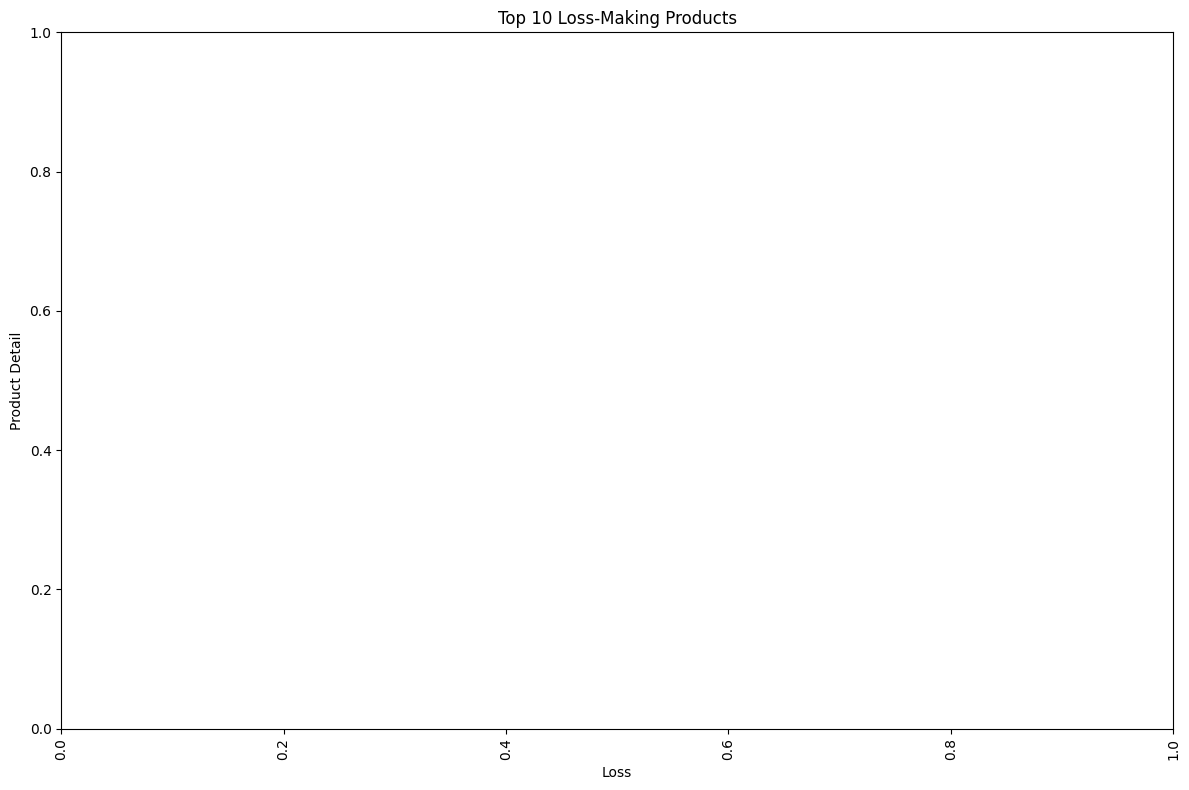

In [40]:
top_10_loss_making = top_loss_making_products.sort_values(by='profit', ascending=True).head(10)
print("Top 10 Loss-Making Products:\n", top_loss_making_products.head(10))
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_detail', data=top_10_loss_making, hue='product_detail')
plt.xticks(rotation=90)
plt.title('Top 10 Loss-Making Products')
plt.xlabel('Loss')
plt.ylabel('Product Detail')
plt.legend([], frameon=False)
plt.tight_layout()
plt.show()


In [42]:
features = product_summary[['transaction_qty', 'unit_price', 'total_sales']]
target = product_summary['profit']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
profit_predictions = model.predict(X_test)

In [44]:
coefficients = pd.DataFrame({'Feature': features.columns,
'Coefficient': model.coef_})
print(coefficients)

           Feature   Coefficient
0  transaction_qty -7.397314e-16
1       unit_price -4.088951e-13
2      total_sales  9.500000e-01


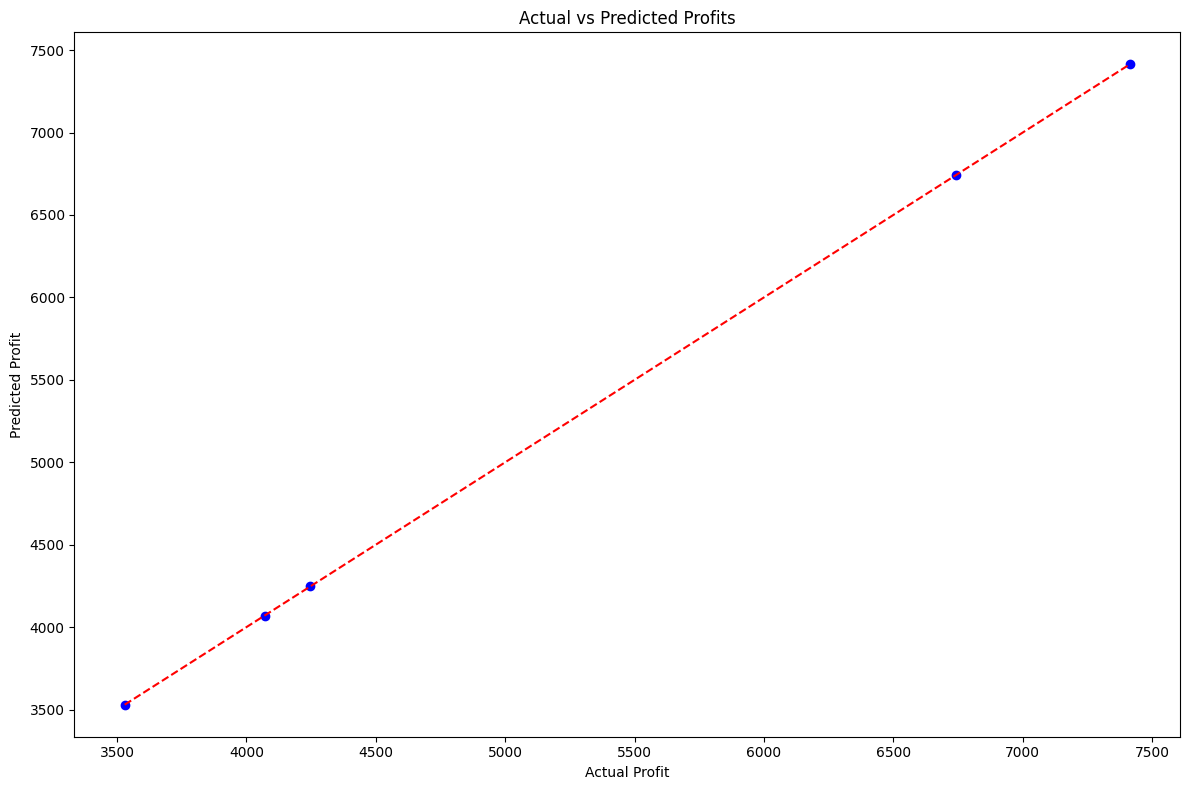

In [45]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, profit_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profits')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.tight_layout()
plt.show()

In [48]:
print(data.columns)


Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week',
       'total_sales'],
      dtype='object')


In [55]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%d-%m-%Y')
daily_sales = data.set_index('transaction_date').resample('D')['total_sales'].sum().reset_index()
daily_sales = daily_sales.fillna(0)

In [56]:
decomposition = sm.tsa.seasonal_decompose(daily_sales, model='additive')
decomposition.plot()
plt.show()

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [57]:
!pip install statsmodels
import statsmodels.api as sm
import pandas as p

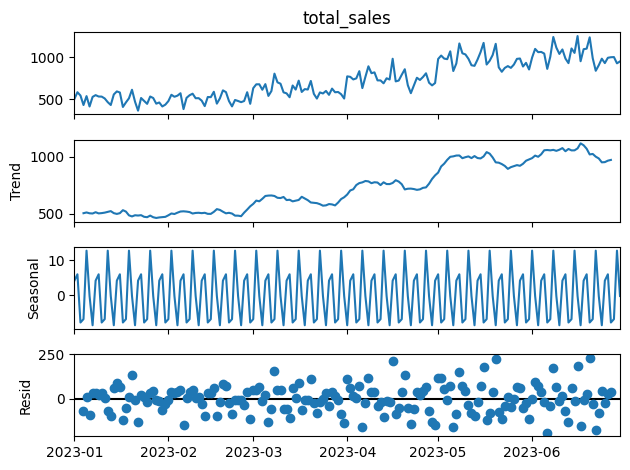

In [59]:
decomposition = sm.tsa.seasonal_decompose(daily_sales.set_index('transaction_date')['total_sales'], model='additive')  # Set 'transaction_date' as index
decomposition.plot()
plt.show()

In [60]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(daily_sales, order=(5, 1, 0))
arima_result = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [61]:
from statsmodels.tsa.arima.model import ARIMA
daily_sales['transaction_date'] = pd.to_datetime(daily_sales['transaction_date'])
daily_sales = daily_sales.set_index('transaction_date')
model = ARIMA(daily_sales['total_sales'], order=(5, 1, 0))
arima_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


NameError: name 'forecast' is not defined

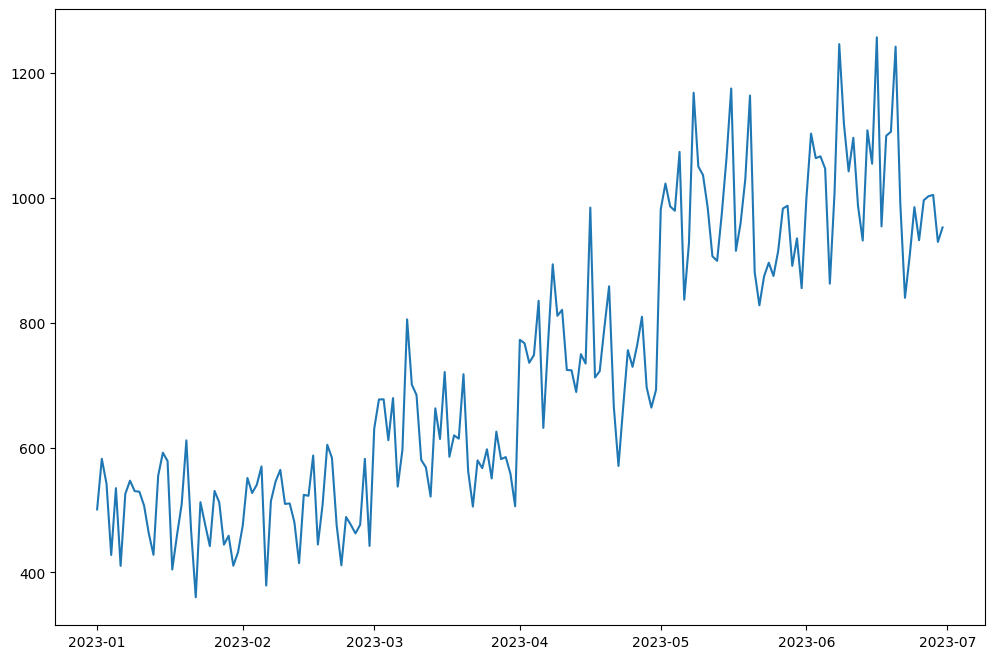

In [62]:

plt.figure(figsize=(12, 8))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()


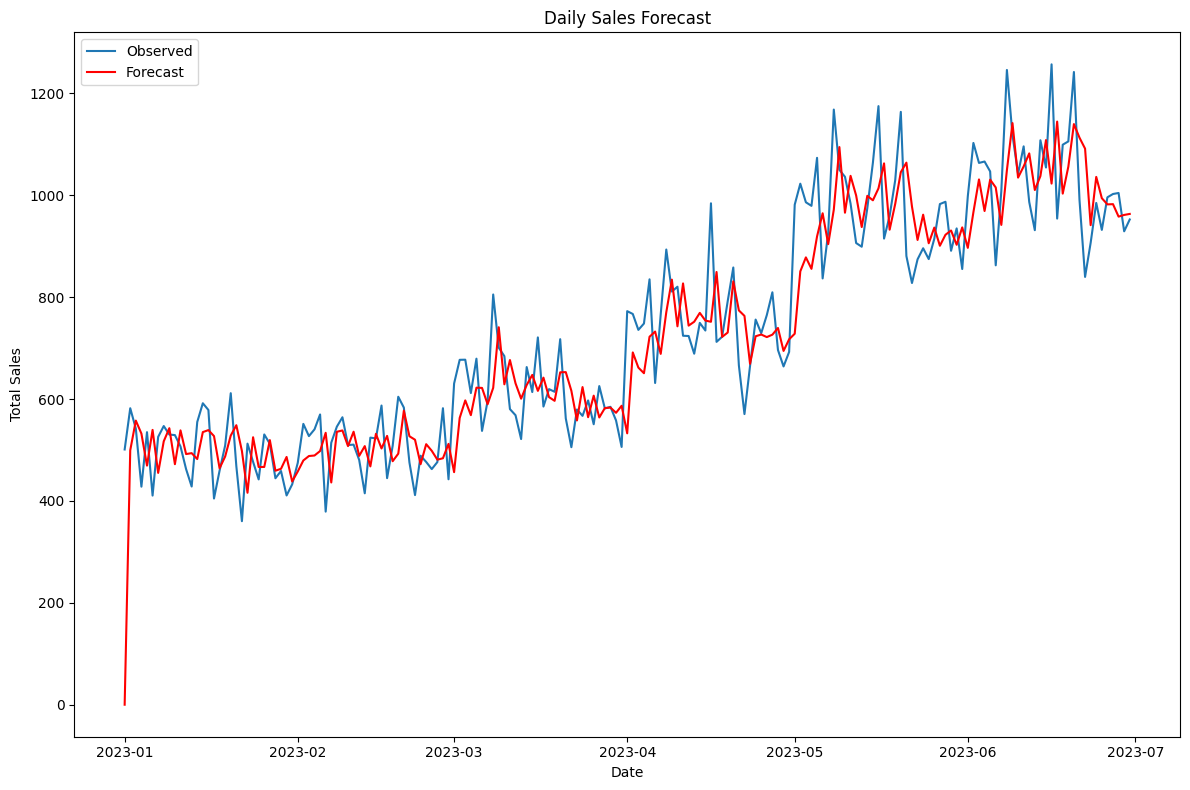

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

forecast = arima_result.predict(start=daily_sales.index.min(), end=daily_sales.index.max()) # forecasts in-sample
plt.figure(figsize=(12, 8))
plt.plot(daily_sales['total_sales'], label='Observed') # Access the 'total_sales' column for plotting
plt.plot(forecast, label='Forecast', color='red')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()